In [579]:
import numpy as np
import imageio as imageio
import matplotlib.pyplot as plt
%matplotlib inline

## Initialization

In [580]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# convert locations to tuple format:
for i in locations.keys():
    locations[i] = (locations[i][0], locations[i][1])

start = locations['start']
movie = locations['movie']
snacks = locations['snacks']
food = locations['food']
store = locations['store']

### Process map

In [581]:
grid_map_render = grid_map.copy()
for i in range(1000):
    for j in range(1000):
        if grid_map[i, j] == 0:
            continue
        else:
            # current node is white, 255
            if i == 999 or j == 999:
                continue
            if grid_map[i-1,j]+grid_map[i+1,j] == 0 or grid_map[i,j-1]+grid_map[i,j+1]==0 or grid_map[i+1,j+1]+grid_map[i-1,j-1] == 0 or grid_map[i+1,j-1]+grid_map[i-1,j+1] == 0:
                # this road is only one pixel
                grid_map[i,j] = 0
# plt.imshow(grid_map.transpose(), cmap='gray')

<ipython-input-581-9c333ebc5c27>:10: RuntimeWarning: overflow encountered in scalar add
  if grid_map[i-1,j]+grid_map[i+1,j] == 0 or grid_map[i,j-1]+grid_map[i,j+1]==0 or grid_map[i+1,j+1]+grid_map[i-1,j-1] == 0 or grid_map[i+1,j-1]+grid_map[i-1,j+1] == 0:


## Task 1

In [582]:
def heuristic(current_node, goal_node):
    # Euclidean Distance:
    # return np.sqrt((current_node[0] - goal_node[0])**2 + (current_node[1] - goal_node[1])**2)

    # Manhattan Distance:
    # return abs(current_node[0] - goal_node[0]) + abs(current_node[1] - goal_node[1])

    # Chebyshev Distance:
    return max(abs(current_node[0] - goal_node[0]), abs(current_node[1] - goal_node[1]))

def get_neighbors(current_node, grid_map):
    neighbors = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            # skip the current cell
            if i == 0 and j == 0:
                continue
            neighbor_x = current_node[0] + i
            neighbor_y = current_node[1] + j
            # check if the neighbor is within the boundaries of the grid
            if neighbor_x >= 0 and neighbor_x < grid_map.shape[0] and neighbor_y >= 0 and neighbor_y < grid_map.shape[1]:
                # check if the neighbor is free
                if grid_map[neighbor_x, neighbor_y] == 255:
                    # compute the cost to reach the neighbor
                    if i == 0 or j == 0:
                        cost = 0.2
                    else:
                        cost = 0.282
                    neighbors.append(((neighbor_x, neighbor_y), cost))
    return neighbors

def Astar(grid_map, start, end):
    # initialize the open and closed sets
    open_set = {start: 0}
    closed_set = {}
    # initialize the came from and g score dictionaries
    came_from = {}
    g_score = {start: 0}
    
    # while the open set is not empty
    while open_set:
        # get the node with the lowest f score
        current_node = min(open_set, key=open_set.get)
        # if we reach the goal node, reconstruct the path and return it
        if current_node == end:
            path = [current_node]
            total_distance = 0
            while current_node in came_from:
                current_node, distance = came_from[current_node]
                path.append(current_node)
                total_distance += distance
            path.reverse()
            return path, total_distance, closed_set
        
        # move the current node from the open set to the closed set
        closed_set[current_node] = open_set.pop(current_node)
        # generate the list of valid neighbors
        neighbors = get_neighbors(current_node, grid_map)
        
        # loop over the neighbors
        for neighbor, cost in neighbors:
            # if the neighbor is already in the closed set, skip it
            if neighbor in closed_set:
                continue
            # compute the tentative g score for the neighbor
            tentative_g_score = g_score[current_node] + cost
            # if the neighbor is not in the open set, add it
            if neighbor not in open_set:
                open_set[neighbor] = tentative_g_score + heuristic(neighbor, end)
            # if the neighbor is already in the open set and the tentative g score is greater than or equal to the current g score, skip it
            elif tentative_g_score >= g_score[neighbor]:
                continue

            # update the came from dictionary and the g score dictionary with the new values
            came_from[neighbor] = (current_node, cost)
            g_score[neighbor] = tentative_g_score
            
    # if we reach this point, it means there is no path to the goal node
    return None, None, closed_set


In [583]:
start_node = food
end_node = movie
path, distance, closed_set = Astar(grid_map, start_node, end_node)
print("Path: ", path)
print("Distance: ", distance)
print("Visited nodes: ", len(closed_set))

Path:  [(535, 800), (536, 800), (537, 800), (538, 800), (539, 800), (540, 800), (541, 800), (542, 800), (543, 800), (544, 800), (545, 800), (546, 800), (547, 800), (548, 800), (549, 800), (550, 800), (551, 800), (552, 800), (553, 800), (554, 800), (555, 800), (556, 800), (557, 800), (558, 800), (559, 800), (560, 800), (561, 800), (562, 800), (563, 800), (564, 800), (565, 800), (566, 800), (567, 800), (568, 800), (569, 800), (570, 800), (571, 800), (572, 800), (573, 800), (574, 800), (575, 800), (576, 800), (577, 800), (578, 800), (579, 800), (580, 800), (581, 800), (582, 800), (583, 800), (584, 800), (585, 801), (585, 802), (586, 803), (587, 804), (588, 804), (589, 805), (590, 806), (591, 807), (592, 808), (593, 808), (594, 809), (595, 809), (596, 810), (597, 811), (598, 812), (599, 812), (600, 813), (601, 814), (602, 814), (603, 815), (604, 815), (605, 816), (606, 816), (607, 817), (608, 817), (609, 818), (610, 818), (611, 819), (612, 820), (613, 820), (614, 821), (615, 821), (616, 82

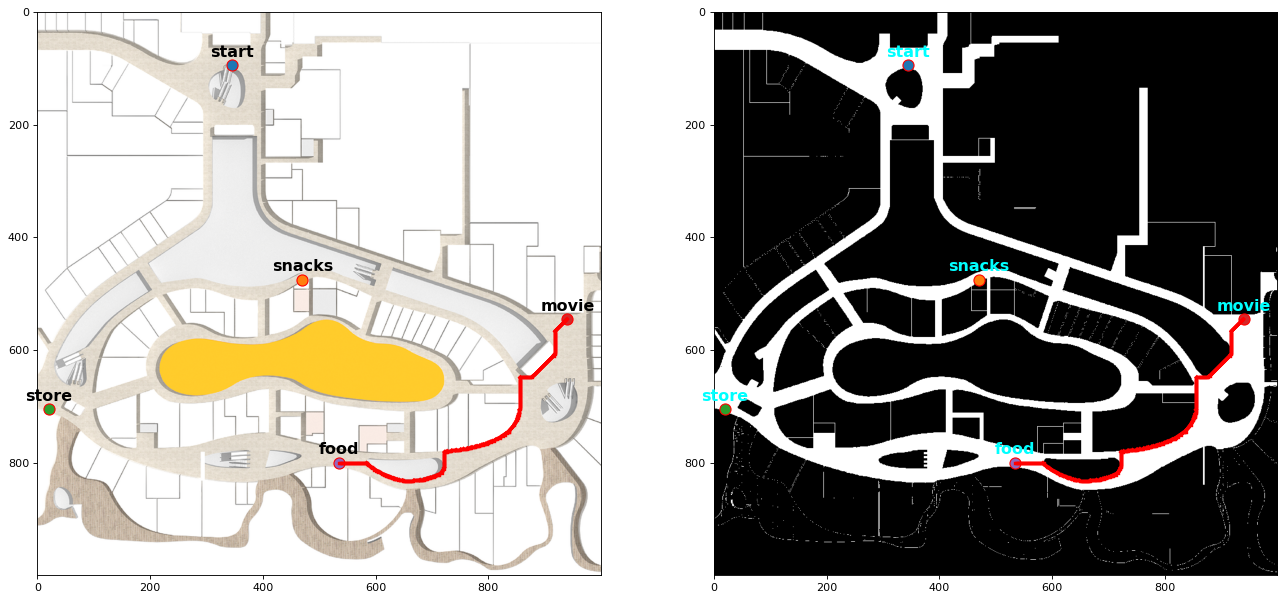

In [584]:
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
# plot the path
for i in range(len(path)-1):
    x = [path[i][0], path[i+1][0]]
    y = [path[i][1], path[i+1][1]]
    plt.plot(x, y, 'r', linewidth=3)
plt.subplot(1,2,2)
plt.imshow(grid_map_render.transpose(), cmap='gray')
plot_locations(locations, color='cyan')
# plot the path
for i in range(len(path)-1):
    x = [path[i][0], path[i+1][0]]
    y = [path[i][1], path[i+1][1]]
    plt.plot(x, y, 'r', linewidth=3)

plt.savefig("/Users/jiayansong/Desktop/nus/ME5413/NUS-ME5413-Projects/Project3-Planning/figures/"+"astar_"+"ch_"+str(list(locations.keys())[list(locations.values()).index(start_node)])+str(2)+str(list(locations.keys())[list(locations.values()).index(end_node)])+".png")

## Task 3